In [98]:
import numpy as np
from math import log
import math as m
from scipy import stats
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import matplotlib.pyplot as plt
import statistics

### 1. Radioactive decay chain


 $Tl^{208}$ decays to $Pb^{208}$
 with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t) = 1-2^{-t/\tau}$
. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time

* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t) = 2^{-t/\tau}\frac{ln(2)}{\tau}$
 
 to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time


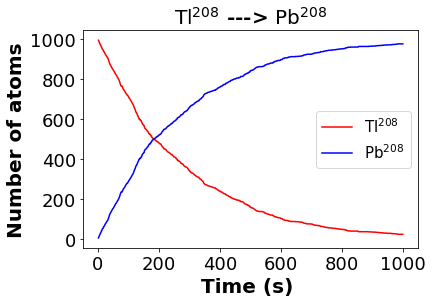

In [2]:
tau=3.052*60  #half-llive time

def prob0(t):
    return 1-2**(-(t)/(tau)) #first probability


N0_Tl = 1000 #starting atoms

N_Tl_elem = N0_Tl #start with a sample of 1000 Thallium atoms and 0 of Lead atoms
N_Pb_elem=0 #start with 0 of Lead atoms

draws = np.random.uniform(0, 1,1000) #1000 uniform random values
t_max=1000
times=np.array([])
N_Tl=np.array([])
N_Pb=np.array([])

for t in range(1, t_max): #take steps in time of 1 second
    times = np.append(times,t)
    for i in range(len(draws)):
        if(i>=len(draws)):
            break
        if(draws[i]<(prob0(t)) and N_Tl_elem>0):
            draws=np.delete(draws,[i])
            #Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one
            N_Tl_elem=N_Tl_elem-1
            N_Pb_elem=N_Pb_elem+1
    N_Tl=np.append(N_Tl,N_Tl_elem)
    N_Pb=np.append(N_Pb,N_Pb_elem)
    
    
plt.plot(times,N_Tl,c="r",label=r"${\rm Tl}^{208}$")
plt.plot(times,N_Pb,c="b",label=r"${\rm Pb}^{208}$")
plt.xlabel("Time (s) ",fontsize=20,fontweight="bold")
plt.tick_params(labelsize=18)
plt.title(r"${\rm Tl}^{208}$ ---> ${\rm Pb}^{208}$",fontsize=20,fontweight="bold")
plt.ylabel("Number of atoms",fontsize=20,fontweight="bold")
plt.legend(fontsize=15,loc="best")
plt.show()

Text(0.5, 1.0, 'Number of atoms that have not decayed as a function of time\n')

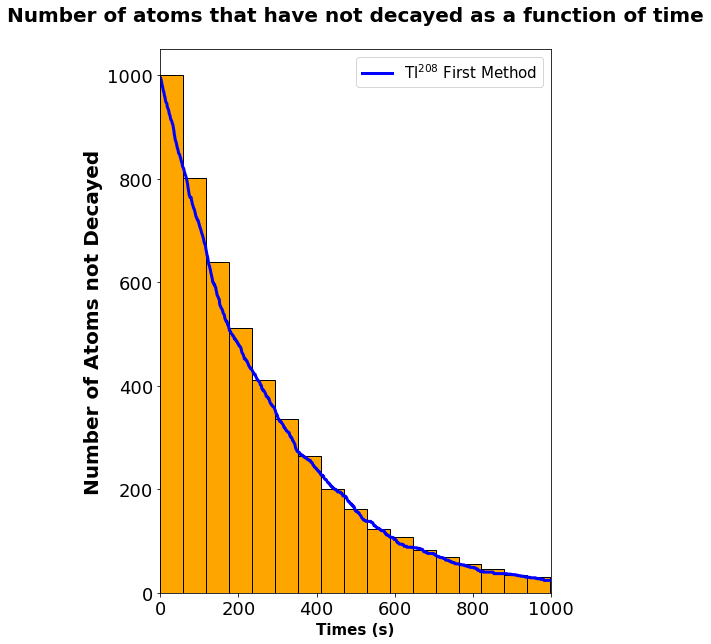

In [3]:
def prob(t):
    return (log(2)/tau)*2**(-t/tau)


def expon1(p, mu=np.log(2)/tau):
    return -np.log(1-p)/mu

x = np.random.uniform(0,1,1000)
fig, ax = plt.subplots(1,1, figsize=(7, 10))

t1 = expon1(x)


ax.hist(t1,bins=40,cumulative=-1,edgecolor="black",color="orange")
ax.plot(times,N_Tl,c="blue",label=r"${\rm Tl}^{208}$ First Method",linewidth=3.0)
ax.set_ylabel("Number of Atoms not Decayed",fontsize=20,fontweight="bold")
ax.set_xlabel(r"Times (s)",fontsize=15,fontweight="bold")
ax.tick_params(labelsize=18)
ax.set_xlim(0,1000)
ax.legend(fontsize=15,loc="best")
ax.set_title("Number of atoms that have not decayed as a function of time\n",fontweight="bold",fontsize=20)

### 2. Rutherford Scattering

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$\tanh(\frac{\theta}{2}) = \frac{Ze^{2}}{2\pi\epsilon_{0}Eb}$
 
 
where:
* $E = 7.7 Mev$
* $b$ beam is the impact parameter

The beam is represented by a 2D gaussian distribution with $\sigma = \frac{a_{0}}{100}$
 for both coordinates (
 being the Bohr radius). Assume 1 million  particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

Fraction of particles that bounce back:  0.154 %


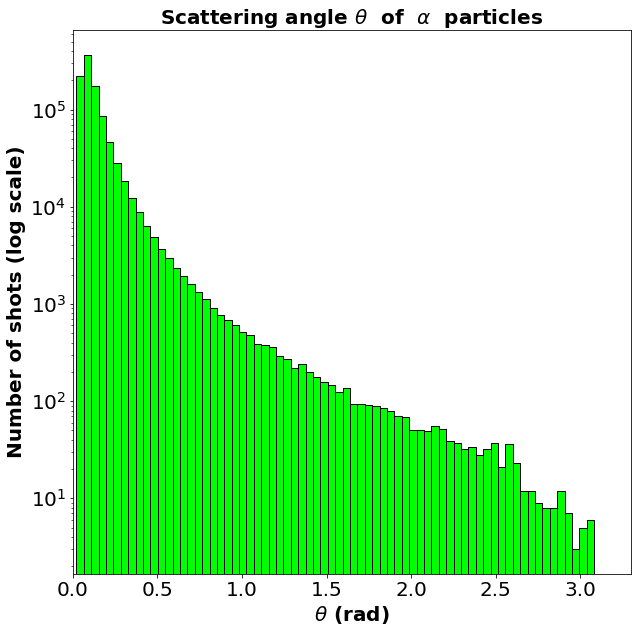

In [4]:
Z=79
particles=10**(6)
e_charge=1.602176565*10**(-19)
E=7.7*10**(6)*e_charge
a0=5.2917721067*10**(-11)
e0=8.8541878176*10**(-12)

x = np.random.normal(0, a0/100, particles)
y = np.random.normal(0, a0/100, particles)


#I have assumed that r, that is the impact parameter b, is the distance from the origin
r=np.sqrt(np.power(x,2)+np.power(y,2))
cost=(Z*e_charge**2)/(2*np.pi*e0*E)
theta=2*np.arctan(cost/r)


print ("Fraction of particles that bounce back: ",round((float(len(theta[theta>np.pi/2]))/particles)*100,3),"%")
plt.figure(figsize=(10, 10))
plt.hist(theta,bins=70,edgecolor="black",color="lime")
plt.xlim(0,3.3)
plt.yscale('log')
plt.xlabel(r"$\theta$ (rad)",fontsize=20,fontweight="bold")
plt.tick_params(labelsize=20)
plt.title(r"Scattering angle $\theta$  of  $\alpha$  particles ",fontsize=20,fontweight="bold")
plt.ylabel("Number of shots (log scale)",fontsize=20,fontweight="bold")
plt.show()

### 3. Monte Carlo integration: hit/miss vs mean value method

Consider the function: 
$f(x) = sin^{2}(\frac{1}{x(2-x)})$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

The correct result at the sixth significant digit is: $1.45140$
It was decided to understand the error not as the result of the difference with the correct value of the integral known a priori. Theoretically, in fact, in a concrete example where the algorithm is useful it is not known.
It was rather understood as the uncertainty that the method itself determines on its result.
The formula used is found in [this](http://cis.poly.edu/~mleung/CS909/s04/mc4.pdf#page=14) document.

##### Hit/Miss Method 

In [5]:
#here I generalize the function for the integration
def integral_hit_miss_1D(f,N,h,a,b):
    count=0
    for j in range(N):
        x=np.random.uniform(a, b)
        y=np.random.uniform(0, h)
        if y<f(x): count+=1
    I=(b-a)*h*(float(count)/float(N)) 
    errI = 0.67*m.sqrt(I*((b-a)*h-I)/N)
    return round(I,6),round(errI,6)



#I define the function 
def f(x):
    return (np.sin(1/(x*(2-x))))**2



N0=100000
I,err=integral_hit_miss_1D(f,N0,1,0,2)
print("Result of the Integral computed with hit/miss method\n")
print("I = ",I,"+-",err)

Result of the Integral computed with hit/miss method

I =  1.45024 +- 0.001892


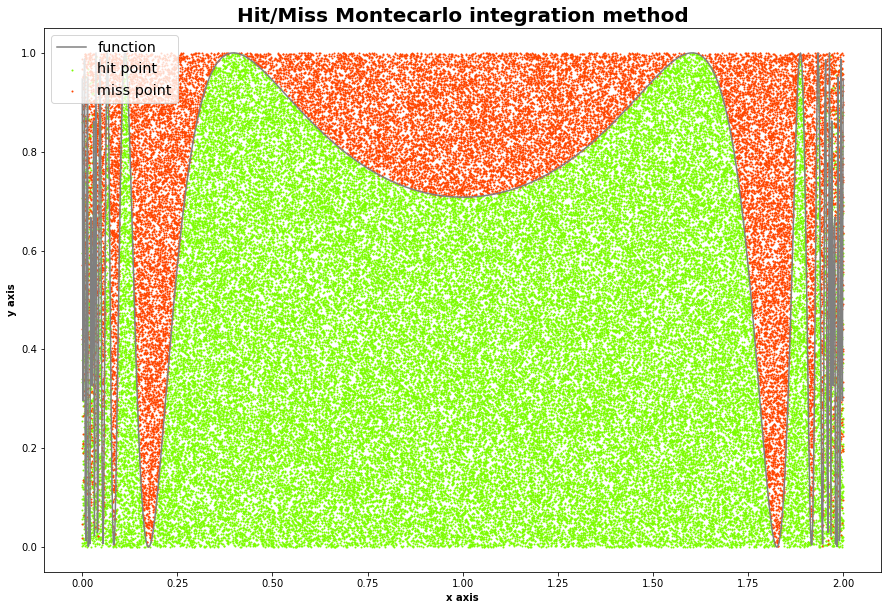

In [6]:
#Here I plot the Montecarlo simulation

a = 0
b = 2
h = 1 
N0=100000
x=np.random.uniform(a, b,N0)
y=np.random.uniform(0, h,N0)


plt.figure(figsize=(15, 10))
#plt.scatter(x,y,s=1)
x_val = np.linspace(0.00001,1.99999,1000)
y_val= f(x_val)
plt.plot(x_val,y_val,color="grey",label="function")



x_hit = []
y_hit = []

x_miss = []
y_miss = []

for i in range(N0):
    if y[i] <= f(x[i]):
        y_hit.append(y[i])
        x_hit.append(x[i])
    else:
        y_miss.append(y[i])
        x_miss.append(x[i])
        
        
plt.scatter(x_hit,y_hit,s=1,color="lawngreen",label="hit point")
plt.scatter(x_miss,y_miss,s=1,color="orangered",label="miss point")
plt.legend(loc="best")
plt.xlabel("x axis",fontweight="bold")
plt.ylabel("y axis",fontweight="bold")
plt.title("Hit/Miss Montecarlo integration method",fontweight="bold",fontsize=20)
plt.legend(fontsize="x-large")

#### Mean Value Method

In [7]:
def integral_mean_value(f,N,a,b):
    x=np.random.uniform(a, b)
    sum0=np.array([])
    for j in range(N):
        x=np.random.uniform(a, b)
        sum0=np.append(sum0,f(x))
    I=(float(b-a)/float(N))*np.sum(sum0)
    err=((b-a)/m.sqrt(N))*np.std(sum0)
    return round(I,6),round(err,6)


N1=100000
I,err=integral_mean_value(f,N1,0,2)
print("Result of the Integral computed with mean value method\n")
print("I = ",I,"+-",err)

Result of the Integral computed with mean value method

I =  1.450792 +- 0.001665


It's possibile to notice that the two method return approximately the same result.

#### 4. Monte Carlo integration in high dimension

* Start of by computing the area of a circle of unit radius, by integrating the function

$f(x,y) = 1$ if $x^{2} + y^{2} \leq 1$ 


$f(x,y) = 0$ if elsewhere

In [8]:
def f(x,y,N):
    z = []
    for i in range(N):
        r = x[i]**2 + y[i]**2
        if r <= 1:
            z.append(1)
        else:
            z.append(0)
    return z


In [9]:
N = 10000
a = 2
x=np.random.uniform(-a, a,N)
y=np.random.uniform(-a, a,N)
z = f(x,y,N)

x_in = []
y_in = []
z_in = []

x_out = []
y_out = []
z_out = []

for i in range(N):
    if z[i] == 1:
        x_in.append(x[i])
        y_in.append(y[i])
        z_in.append(z[i])
    
    else:
        x_out.append(x[i])
        y_out.append(y[i])
        z_out.append(z[i])
        

Text(0.5, 0.92, 'MonteCarlo Integration in two dimension')

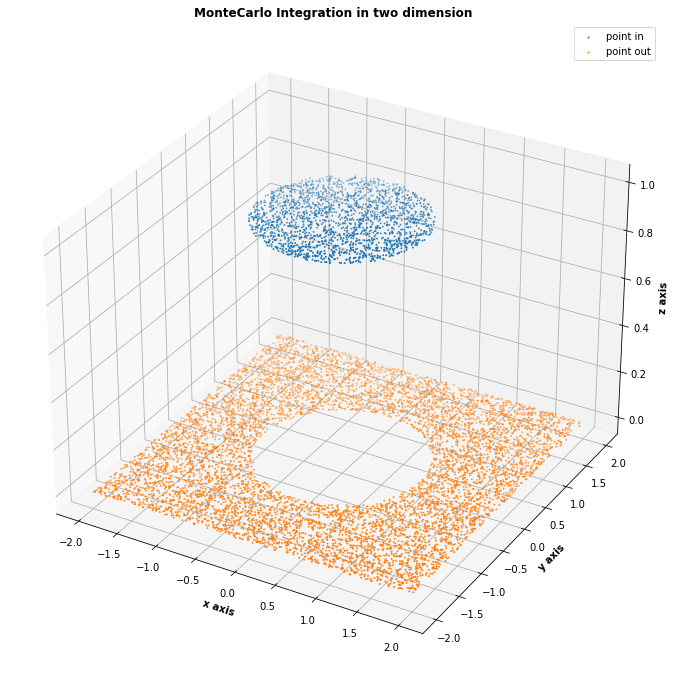

In [10]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_in, y_in, z_in,label="point in",s=0.9)
ax.scatter(x_out, y_out, z_out,label="point out",s=0.9)
ax.legend(loc="best")
ax.set_xlabel("x axis",fontweight="bold")
ax.set_ylabel("y axis",fontweight="bold")
ax.set_zlabel("z axis",fontweight="bold")
ax.set_title("MonteCarlo Integration in two dimension",fontweight="bold")

In [11]:
point_in = len(z_in)
Area = (2*a)**2 *(float(point_in)/float(N))
volume = (2*a)**2
Error_Area =  0.67*m.sqrt((Area*volume-Area)/N)

print("Result of the Integral computed with mean value method:\n")
print("Area = ",round(Area,4),"+-",round(Error_Area,4))

Result of the Integral computed with mean value method:

Area =  3.1648 +- 0.0462


It's possible to notice that the result obtained, within the error, is compatible to the expected one, namely $\pi = 3,1415...$

* Generalize the result for a 10D sphere

In [12]:
#I have re-defined the functin fora generic dimension
def n_sphere(array):
    a=sum(np.power(x,2) for x in array)
    if a <=1: 
        return 1
    else: 
        return 0


    
N=1000000
count=0
dimension=10 
for j in range(N):
    x=np.random.uniform(-1,1,dimension) #In 10 dimension I have restricted the interval in (-1,1) instead of  (-2,2)
    if n_sphere(x)==1: 
        count+=1
volume=2**dimension
I=volume*(float(count)/float(N))
errI = 0.67*m.sqrt(I*(volume-I)/N)
    
print("I = ",round(I,4),"+-",round(errI,4))

I =  2.4812 +- 0.0337


The value obtained is close the the correct one ($2.5501$)

#### 5. Monte Carlo integration with importance sampling

Calculate the value of the integral:

$\int_{0}^{1} {\frac{x^{-1/2}}{e^{x}+1}}dx$

using the importance sampling method with $w(x) = 1/\sqrt(x)$ . You should get a result about 0.84

In [13]:
def weight(x):
    return 1/np.sqrt(x)

def f(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))

N=500000
x=np.random.uniform(0,1,N)
integralparz,error=integral_mean_value(weight,N,0,1)
intetot=(sum((f(x[i])/weight(x[i])) for i in range(N))/N)*integralparz
print("I = ",round(intetot,2))

I =  0.76


The expected result is $0.84$, but I have obtained $0.76$. For This reason I have computed the simulation for different values of $N$

In [119]:
results= []
for N in range(1,10**6+10**5,100000):
    x=np.random.uniform(0,1,N)
    integralparz,error=integral_mean_value(weight,N,0,1)
    intetot=(sum((f(x[i])/weight(x[i])) for i in range(N))/N)*integralparz
    results.append(intetot)    

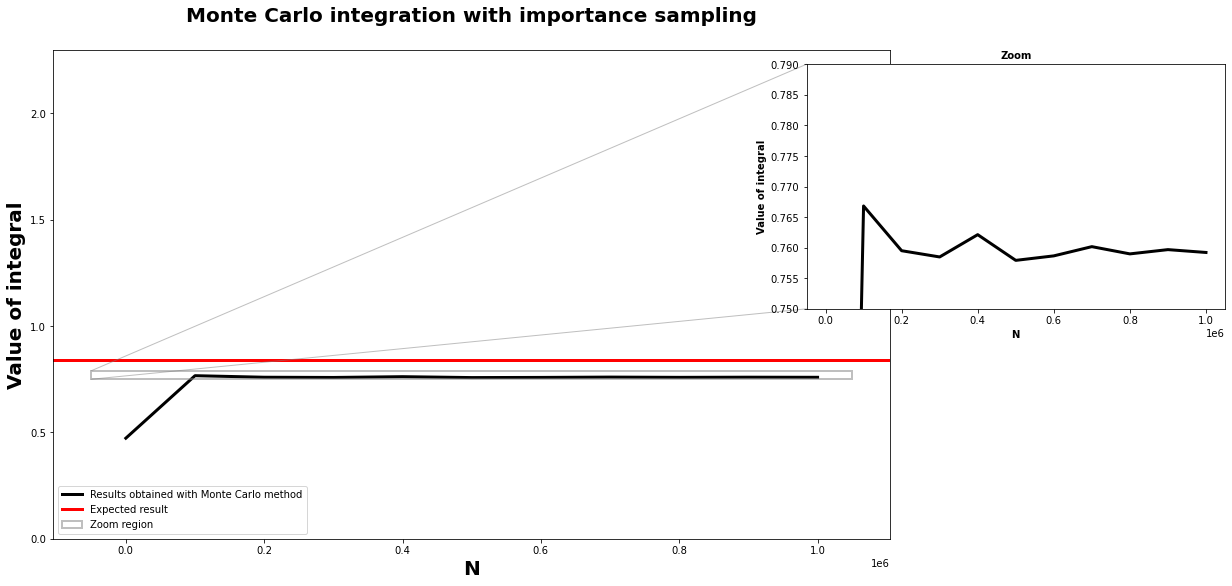

In [124]:
N = [i for i in range(1,10**6+10**5,100000)]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,9))
ax.plot(N,results,color="black",linewidth=3,label="Results obtained with Monte Carlo method")
axins = ax.inset_axes([0.9,0.47,0.5,0.5])
axins.plot(N,results,color="black",linewidth=3)
axins.set_ylim(0.75, 0.79)
ax.indicate_inset_zoom(axins, edgecolor="grey",linewidth=2,label="Zoom region")
ax.set_xlabel("N",fontsize=20,fontweight="bold")
axins.set_xlabel("N",fontsize=10,fontweight="bold")
ax.set_ylabel("Value of integral",fontsize=20,fontweight="bold")
axins.set_ylabel("Value of integral",fontsize=10,fontweight="bold")
ax.set_title("Monte Carlo integration with importance sampling\n",fontweight="bold",fontsize=20)
axins.set_title("Zoom",fontweight="bold",fontsize=10)
ax.axhline(0.84,linewidth=3,color="red",label="Expected result")
#axins.axhline(0.76,linewidth=3,color="blue",label="mean value of results obtained with different N")
ax.set_ylim(0, 2.3)
ax.legend(loc="best")

I have plotted a zoom of that region because, on the scale of the plot, it seems to bee constant, but, as you can see in the zoom, it isn''t.

Finally, even if I have computed the integral for different values of N, the result is always near $0.76$
This (bad) results probably depends on the distribution of $x$ and $y$ values.